# Graphs

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


## Pie chart

In [ ]:
# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

## scatter

In [1]:
plt.scatter(x, y)

NameError: name 'plt' is not defined

## lines

In [ ]:
plt.plot(x,y,label="label of the line")
plt.plot(x,y,label="label of the line") # <-- multi lines

## Box plot

In [4]:
sns.boxplot(x="target",y="feat",data=df)

NameError: name 'sns' is not defined

### ConFusionMatrix

In [ ]:
ConfusionMatrixDisplay.from_estimator(model_reg,X_test,y_test)


### Corelation matrix 


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()
correlation_matrix=correlation_matrix.unstack().sort_values(ascending=False)
correlation_matrix[(correlation_matrix != 1)&(correlation_matrix != 0)&(abs(correlation_matrix) >0.5)]

### Prepare Data

#### first thing to do is make the corelation matrix 
remove the feat with high abs(0.8-0.9) and low abs(0.1) corelation  as they gives the same piece of information 

#### CATEGORICAL DATA
|                   | Ordinal Encoder                                   | One-Hot Encoder                                       |
|-------------------|---------------------------------------------------|--------------------------------------------------------|
| what it does | give each category a value in order 1 2 3 4                  | make a column for each category with 1 for each row has that category                     |
| Approach          | Assigns integer labels based on predefined order | Creates binary columns for each category (dummy coding) |
| Machine Learning | Compatible with tree-based models                  | Compatible with linear models                           |
| Application       | Suitable for ordinal data (e.g., rankings)        | Suitable for nominal data (e.g., categories)           |
| Mathematical      | No mathematical operations                         | Involves distance calculations in linear models         |
| Interpretation    | Retains ordinal relationship among categories     | Treats categories as independent (no ordinality)        |
* ORDINAL :this doesn't do any math with with it but the linear model its about distances and calculations but tree try to split data 
* OHE lead to imbalance tree thats why we dont use it with trees 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder()
from sklearn.preprocessing import OrdinalEncoder
OrdinalEncoder()

In [ ]:

# for missing numerical data    
SimpleImputer(strategy='midian') # <-- mean  default mean
SimpleImputer(strategy='constant', fill_value=0) 

In [8]:
from sklearn.preprocessing import StandardScaler
StandardScaler()

StandardScaler()

#### for categorical data  
* check for high and low cardinalates  like 63 different unique category is alot we need to reduce it how ?
* aggregate the categories with low number of values like  a category with just 3 rows or so to be maybe "others"

In [ ]:
top_10 = df["smt"].value_counts().head(10).index # <-- take the biggest 10  

df["smt"] = df["smt"].apply(lambda c: c if c in top_10 else "Other")

In [ ]:
from sklearn.model_selection import train_test_split # for splitting data 
x_train,y_train,x_test,y_test = train_test_split(x,y,random_state=42)

to see the distribution for classes in classification 


In [ ]:
df["target"].values_counts(normalized = True)
df["target"].values_counts(normalized = True).plot(kind= "bar",xlabel=,ylabel=,title =)

When ur data is skewed u must clip it 

In [ ]:
q1,q9=df['Lot'].quantile([0.1,0.9])
mask =df['lot'].between(q1,q9);
df = df[mask]


### Resample

In [7]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:

under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)

In [ ]:

over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)

### Pandas 

In [2]:
import pandas as pd


In [ ]:
# read cv  for reading anything read_nameOFit
df=pd.read_csv("path")
# get info about data
df.info()
# get the first rows 
df.head(<number>)
#get last rows 
df.tail(<number>)
# set columns names 
pd.read_csv("path",names=[])
# create pandas series 
pd.Series(array,index = features)
# Load dictionary into pandas 
pd.DataFrame().from_dict(data).set_index("name")
# sort values 
df[df['Space'] > 800].sort_values(by='Price', ascending=False)
# to sort series 
df['smt'].sort_values()
# get the mean midian   and others
df["smt"].describe()
# get data with type 
df.select_dtypes("object")
# for number of unique 
df["smt"].nunique()
# for unique values 
df["smt"].unique()
# quantile 
df['Lot'].quantile(0.8)  # this is > 4th qantile 
df['Lot'].quantile([0.1,0.9])  # get both 0.1 , 0.9 values
# wrangle data 
df[(df['Bathroom'] == 2) & (df['Bedroom'] == 4)]


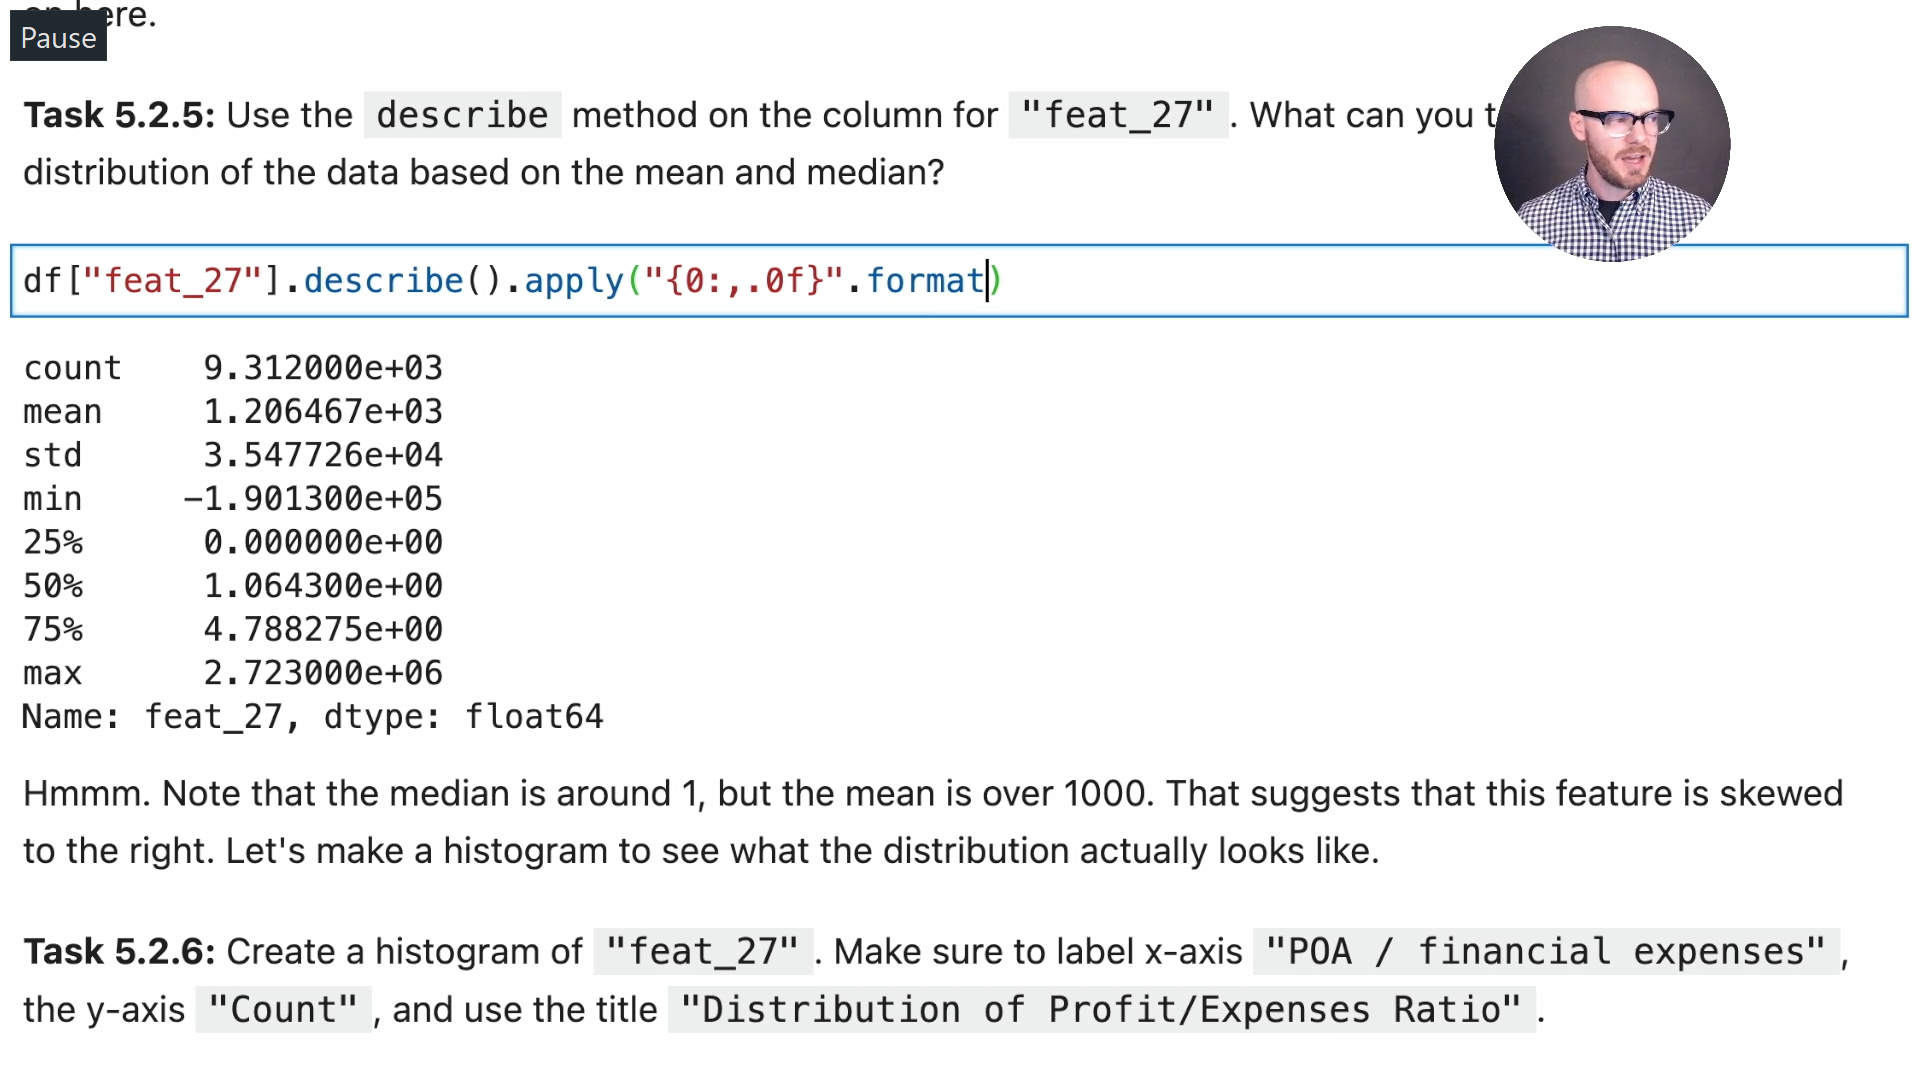

In [6]:
df["feat_27"].describe().apply("{0:,.0f}".format)

display.Image("D:/machine/lesson 4/describe_Clean.png")

### Training

Divide the data to big X and little y

In [ ]:
X =df[["snt","smt"]] or df.drop(columns="target")
y= df['target']

baseLine [avg]

In [ ]:
y_train.values_counts(normalized=True).max()

In [ ]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(

    
)

In [ ]:
# test different hyper parameters 
training_acc = []
validation_acc = []
for d in depth_hyperparam:
    # create model 
    test_model = make_pipeline()
    test_model.fit(X_train,y_train)
    training_acc.append(test_model.score(X_train,y_train))
    validation_acc.append(test_model.score(X_val,y_val))

### Accuracy  

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
acc_train= accuracy_score(y_train, model.predict(X_train))
acc_val = model.score(X_val,y_val) # <-- validation 
classification_report(y_test, y_pred)

In [9]:
from sklearn.model_selection import  cross_val_score

cv_acc_scores = cross_val_score(model,X_train_over,y_train_over,cv=5,n_jobs=-1)


NameError: name 'cross_val_score' is not defined

# Models 

## Classifiers 

##### DecisionTreeClassifier
this is for non linear and linear  relations. Decision Tree models make decision rules on 
the features to produce predictions. It can be 
used for classification or regression
<https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html>

In [4]:
from sklearn.tree  import DecisionTreeClassifier,plot_tree,DecisionTreeRegressor


In [ ]:
model = make_piplene(DecisionTreeClassifier())

In [ ]:
# get the depth of the tree
model.named_steps["decisiontreeclassifer"].get_depth() 
# the longer the depth is the more its fitting to data and don't generalize
# so you try different values in range  like from 1 to the max it goes to
depth_list = range(1,50,2) 

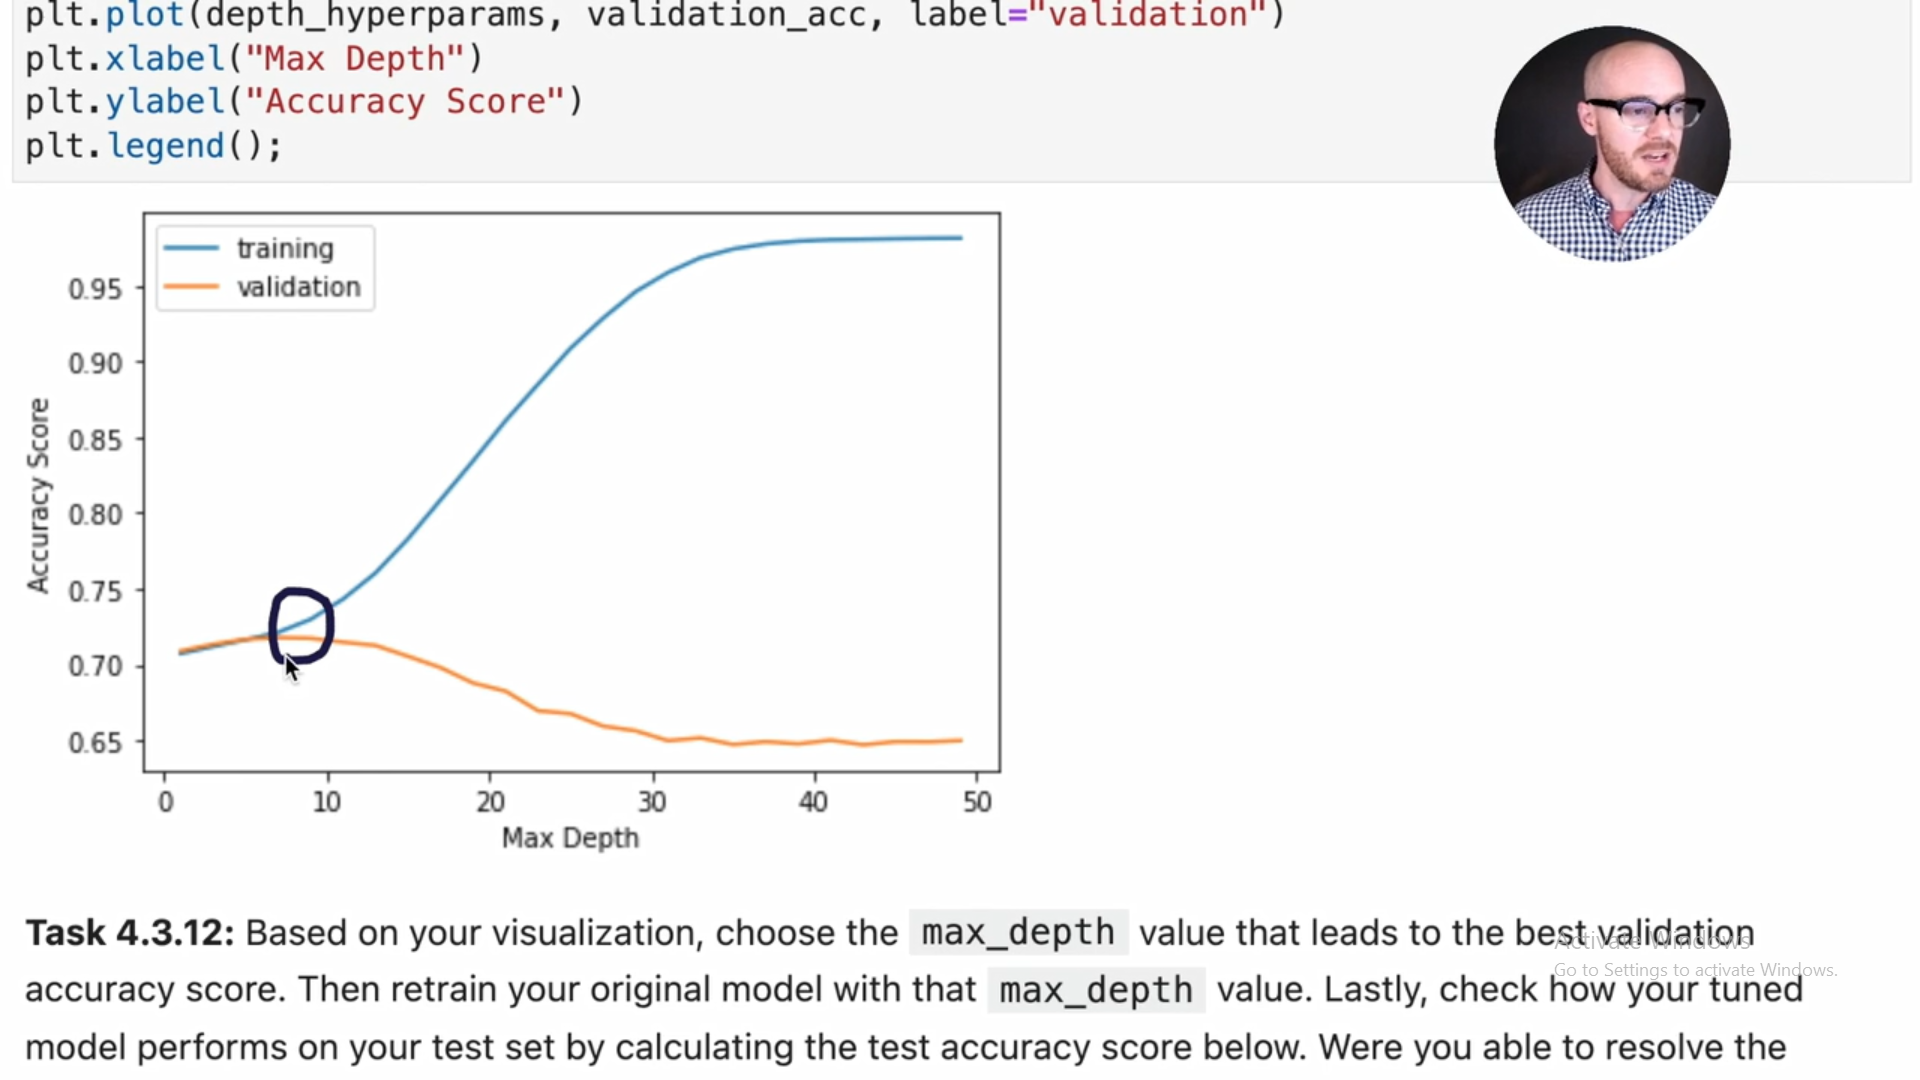

In [5]:
from IPython import display
display.Image("D:/machine/lesson 4/maxDepth.png")

In [ ]:
# Create larger figure
fig, ax= plt.subplots(figsize=(25, 12))

# Plot tree
plot_tree(
decision_tree=model.named_steps["decisiontreeclassifier"] ,
feature_names=X_train.columns,
filled=True, # Color leaf with class
rounded=True, # Round Leaf edges
proportion=True, # Display proportion of classes in leaf
max_depth=3, # Only display first 3 levels
fontsize=12, # Enlarge font
ax=ax, # Place in figure axis
)

# gini is the cost function

###### extract feature 
what you are explaining to others

In [ ]:
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

which  feat is affecting the splitting 

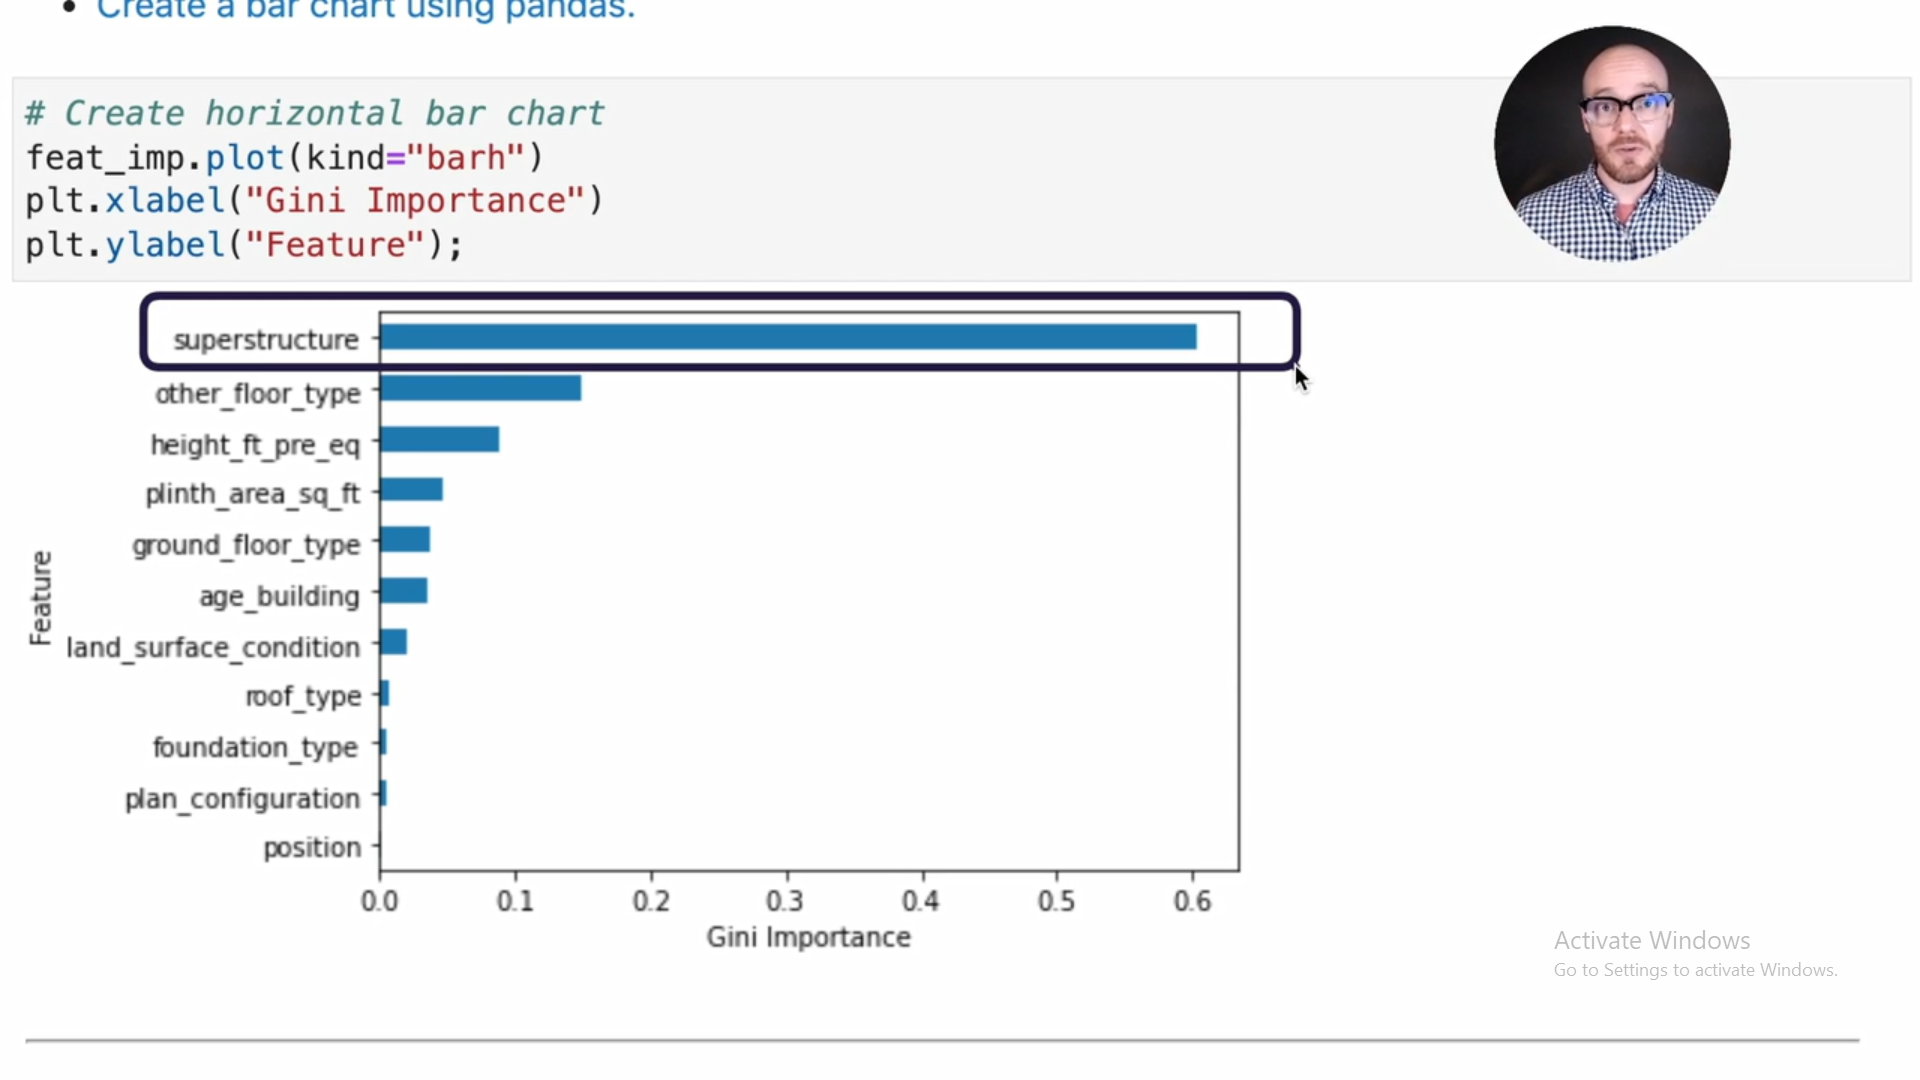

In [7]:
display.Image("D:/machine/lesson 4/43.png")

##### RandomForestClassifier
An ensemble learning method that combines 
the output of multiple decision trees. It can be 
used for classification or regression
<https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html>

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
model = make_piplene(RandomForestClassifier(random_state=42))

n_estimators is number of trees , max_depth 

to use GridSearchCv u need the hyper parms u r using to be in the format like this  cuz we using make_pipline

In [ ]:
params = {
    "randomforestclassifier__n_estimators":range(25,100,25),
    "randomforestclassifier__max_depth":range(10,50,10),
    "simpleimputer__strategy":["mean","median"]
}
params

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = GridSearchCV(
    model,
    param_grid=params,
    cv=5, # numbre of folds  in cross validation
    n_jobs=-1,
    verbose=1,
    
)
model

In [10]:
# see the data after Grid Search
pd.DataFrame(model.cv_results_) # rank test score has to know which is the best
model.best_params_ 
model.best_estimator_ # model 

NameError: name 'model' is not defined

Communication

In [ ]:

# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
# Create a series with feature names and importances
feat_imp =pd.Series(importances,index=features)
# Plot 10 most important features
feat_imp.sort_values().tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

## unSupervised Learning 

### k-MEANS

* no target values so u only have the big X 

In [42]:
from sklearn.cluster import KMeans
import pandas as pd 
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [11]:
df = pd.read_csv('MlMediumTrainingData.csv')
df

,x_,y_,class
0,13.056302,-0.059154,0
1,13.261382,-0.080945,0
2,13.118969,0.408401,0
3,13.052276,0.368701,0
4,12.999014,0.557632,0
...,...,...,...
2032,14.260516,-14.938739,-1
2033,0.739484,34.938739,-1
2034,-0.739484,-34.938739,-1
2035,20.739484,-0.061261,-1


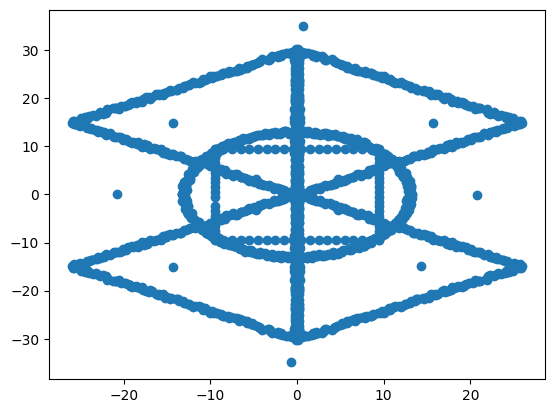

In [5]:
plt.scatter(df['x_'],df['y_'])

In [15]:
df['class'].value_counts(normalize=True)


 0    0.996073
-1    0.003927
Name: class, dtype: float64

In [36]:
X =df.drop(columns=['class'])
y = df['class']

In [9]:
from sklearn.model_selection import train_test_split # for splitting data 
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=.8)

In [43]:

over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(x_train,y_train)

In [46]:
y_train_over.value_counts(normalize=True)


 0    0.5
-1    0.5
Name: class, dtype: float64

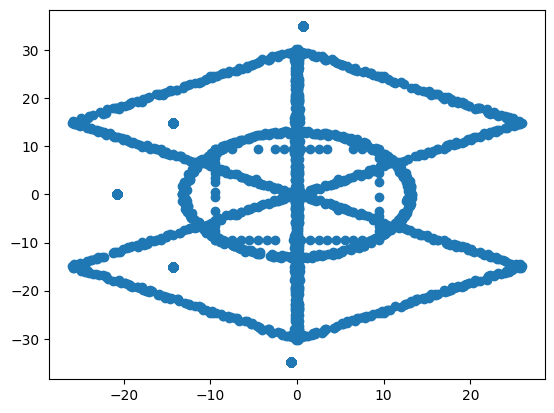

In [45]:
plt.scatter(X_train_over['x_'],X_train_over['y_'])

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train_over, y_train_over)

KNeighborsClassifier(n_neighbors=1)

In [48]:
y_pred = knn_model.predict(x_test)

In [49]:
from sklearn.metrics import classification_report,accuracy_score
accuracy_score(y_test, model.predict(x_test))

0.5147058823529411

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         3
           0       0.99      1.00      1.00       405

    accuracy                           0.99       408
   macro avg       0.50      0.50      0.50       408
weighted avg       0.99      0.99      0.99       408



c:\Users\20112\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\20112\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\20112\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [51]:
print(model.score(x_test,y_test))

-79396.87549281956


In [ ]:
from teaching_tools.widgets import ClusterWidget, SCFClusterWidget

cw = ClusterWidget(n_clusters=2)
cw.show()

In [ ]:

scfc = SCFClusterWidget(x=df["DEBT"], y=df["HOUSES"], n_clusters=2)
scfc.show()


In [17]:
model = KMeans(n_clusters=2,random_state=42)
model.fit(X)

c:\Users\20112\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [18]:
#labels
labels =model.labels_

In [19]:

centroids = model.cluster_centers_
centroids

array([[ -0.01803246, -13.22755296],
       [  0.05737337,  12.81364557]])

Communication

In [20]:

inertia = model.inertia_
print("Inertia (3 clusters):", inertia)

Inertia (3 clusters): 407820.2919364912


In [21]:
#accuarcy
from sklearn.metrics import silhouette_score

ss = silhouette_score(X,labels)
print("Silhouette Score (3 clusters):", ss)

Silhouette Score (3 clusters): 0.39368799074874256


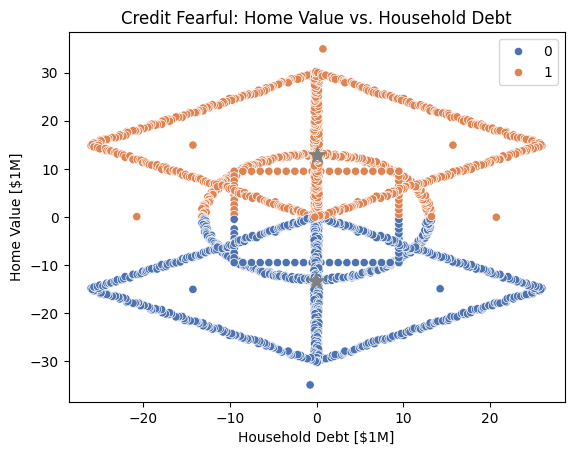

In [23]:
import seaborn as sns

# Plot "HOUSES" vs "DEBT", add centroids
sns.scatterplot(x=df["x_"],y=df["y_"],hue=labels,palette="deep")
plt.scatter(
x=centroids[:,0],y=centroids[:, 1],color="gray",marker="*",s=150
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [ ]:
# get the best  k
n_clusters = range(2,13)
inertia_errors =[]
silhouette_scores =[]

# Add `for` loop to train model and calculate inertia, silhouette score.
for i in n_clusters:
    test_model=KMeans(n_clusters=i,random_state=42);
    test_model.fit(X)
    inertia_errors.append(test_model.inertia_)
    silhouette_scores.append(silhouette_score(X,test_model.labels_))
print("Inertia:", inertia_errors)
print()
print("Silhouette Scores:", silhouette_scores)

In [ ]:
plt.plot(n_clusters,inertia_errors)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs Number of Cluster");

In [ ]:

# Plot `silhouette_scores` vs `n_clusters`
plt.plot(n_clusters,silhouette_scores)


### Liner Regration with timeStamp 

here the feats are a lag version of the actual  data 

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg


In [7]:
def solve_ml_easy(data: pd.DataFrame) -> list:
    data = pd.DataFrame(data)
    df=data
    """
    This function takes a pandas DataFrame as input and returns a list as output.

    Parameters:
    input (pd.DataFrame): A pandas DataFrame representing the input data.

    Returns:
    list: A list of floats representing the output of the function.
    """
    df =df.set_index('timestamp')
    df.index = pd.to_datetime(df.index)
    df = df[df['visits'] <= 40]
    df = df.resample("1D").mean().fillna(method='ffill')
    cutoff_test = int(len(df) *1 )
    y_train = df.iloc[:cutoff_test]
    model = AutoReg(y_train, lags=10).fit()
    
    return list(model.forecast(50))

In [8]:
solve_ml_easy(pd.read_csv('series_data.csv'))

[9.322861031776327,
 9.364517455828478,
 9.28884324724472,
 9.341215303185754,
 8.959394957216457,
 9.050656505499672,
 9.14569234642897,
 8.871524258444811,
 8.69648369228955,
 8.769391602661312,
 8.819249220274338,
 8.791657680036892,
 8.760774248378599,
 8.738276748811872,
 8.726520666025506,
 8.71443885843874,
 8.692778209943935,
 8.677198432454098,
 8.673557875429026,
 8.671082335748231,
 8.665005192189398,
 8.658394146937278,
 8.653236307817314,
 8.649158421070146,
 8.645342967630853,
 8.64169883692871,
 8.63879207816935,
 8.636727551612834,
 8.634980572618215,
 8.633250705358238,
 8.631650002535736,
 8.630290958821446,
 8.629137668663367,
 8.628124759099164,
 8.62723773138327,
 8.626487675769127,
 8.625859887903802,
 8.625316401443138,
 8.624833123662842,
 8.62440783293324,
 8.624040487790825,
 8.623723824516212,
 8.623449168688872,
 8.623211177698586,
 8.623006195394835,
 8.622829678856965,
 8.622676615907606,
 8.622543256954964,
 8.622427317435994,
 8.622326921337276]

In [184]:
df = pd.read_csv('series_data.csv').set_index('timestamp')
df.head(5)

,visits
timestamp,
2015-07-01,4
2015-07-02,8
2015-07-03,4
2015-07-04,9
2015-07-05,7


In [185]:
df.index = pd.to_datetime(df.index)
# df.index = df.index.tz_localize ( "UTC" )

In [186]:
df.tail(4)

,visits
timestamp,
2016-11-08,8
2016-11-09,17
2016-11-10,9
2016-11-11,6


In [187]:
df.head()

,visits
timestamp,
2015-07-01,4
2015-07-02,8
2015-07-03,4
2015-07-04,9
2015-07-05,7


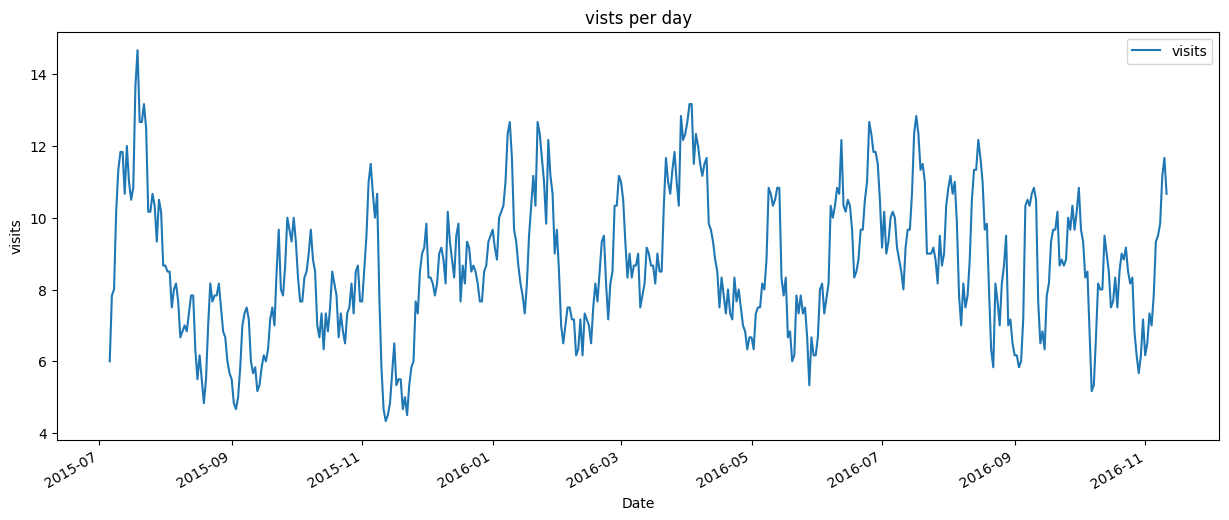

In [190]:
# graph
fig, ax = plt.subplots(figsize=(15, 6))
df.rolling(6).mean().plot(ax=ax, xlabel="Date", ylabel="visits", title="vists per day");

In [189]:

df = df[df['visits'] <= 40]

In [191]:
df = df.resample("1D").mean().fillna(method='ffill')
df

,visits
timestamp,
2015-07-01,4.0
2015-07-02,8.0
2015-07-03,4.0
2015-07-04,9.0
2015-07-05,7.0
...,...
2016-11-07,7.0
2016-11-08,8.0
2016-11-09,17.0


In [201]:
# percentage ---> 90% (0.9), 80% (0.8) ...
cutoff_test = int(len(df) *1 )
y_train = df.iloc[:cutoff_test]
y_test = df.iloc[cutoff_test:]

,visits
timestamp,


### accuracy 


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,model)

## Graphs to know number of lags 

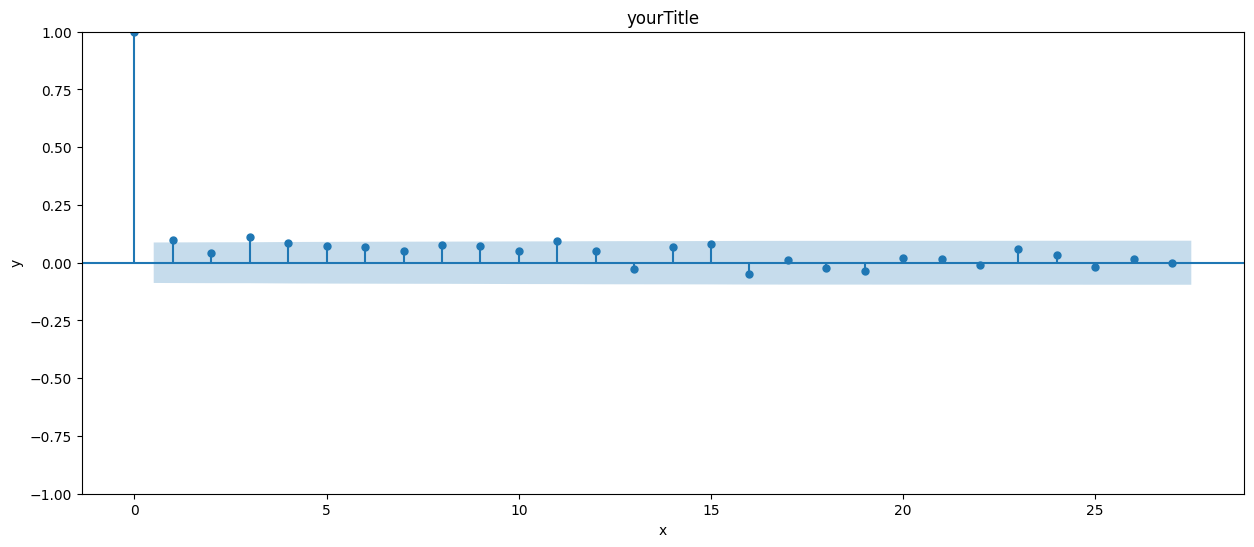

In [203]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(df, ax=ax)
plt.xlabel("x")
plt.ylabel("y")
plt.title("yourTitle");


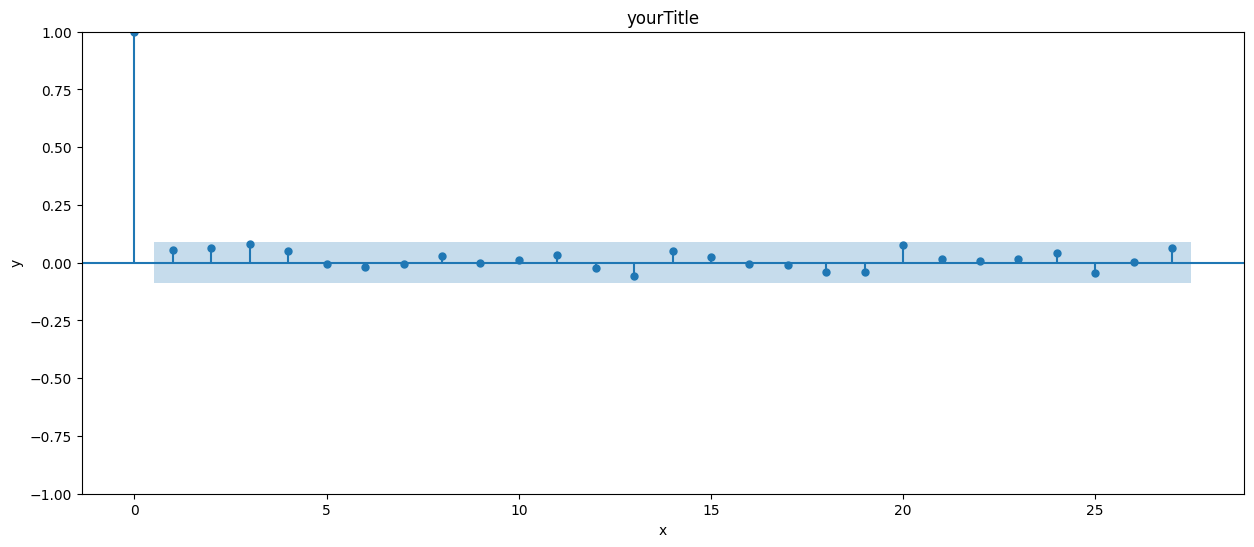

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(df, ax=ax)
plt.xlabel("x")
plt.ylabel("y")
plt.title("yourTitle");

In [228]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(y_train, lags=10).fit()

In [208]:
model.predict()

timestamp
2015-07-01         NaN
2015-07-02         NaN
2015-07-03         NaN
2015-07-04         NaN
2015-07-05         NaN
                ...   
2016-11-07    8.530357
2016-11-08    8.323879
2016-11-09    9.131942
2016-11-10    9.298757
2016-11-11    8.743532
Freq: D, Length: 500, dtype: float64

In [209]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train.iloc[10:],model.predict().dropna()))

14.610266039163642


In [210]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train.iloc[10:],model.predict().dropna())



2.963968510307219

In [233]:
list(model.forecast(50))

[9.322861031776327,
 9.364517455828478,
 9.28884324724472,
 9.341215303185754,
 8.959394957216457,
 9.050656505499672,
 9.14569234642897,
 8.871524258444811,
 8.69648369228955,
 8.769391602661312,
 8.819249220274338,
 8.791657680036892,
 8.760774248378599,
 8.738276748811872,
 8.726520666025506,
 8.71443885843874,
 8.692778209943935,
 8.677198432454098,
 8.673557875429026,
 8.671082335748231,
 8.665005192189398,
 8.658394146937278,
 8.653236307817314,
 8.649158421070146,
 8.645342967630853,
 8.64169883692871,
 8.63879207816935,
 8.636727551612834,
 8.634980572618215,
 8.633250705358238,
 8.631650002535736,
 8.630290958821446,
 8.629137668663367,
 8.628124759099164,
 8.62723773138327,
 8.626487675769127,
 8.625859887903802,
 8.625316401443138,
 8.624833123662842,
 8.62440783293324,
 8.624040487790825,
 8.623723824516212,
 8.623449168688872,
 8.623211177698586,
 8.623006195394835,
 8.622829678856965,
 8.622676615907606,
 8.622543256954964,
 8.622427317435994,
 8.622326921337276]

In [231]:
import numpy as np
actual_values = [2.0, 12.0, 13.0, 1.0, 10.0, 8.0, 6.0, 6.0, 6.0, 8.0, 9.0, 6.0, 1.0, 12.0, 11.0, 7.0, 5.0, 12.0, 8.0, 7.0, 15.0, 11.0, 9.0, 7.0, 9.0, 6.0, 8.0, 13.0, 8.0, 5.0, 12.0, 10.0, 7.0, 7.0, 11.0, 7.0, 14.0, 11.0, 3.0, 10.0, 5.0, 14.0, 8.0, 11.0, 8.0, 24.0, 10.0, 15.0, 12.0, 11.0]

# Convert the actual values array to numpy array for consistency
actual_values = np.array(actual_values)

# Calculate the mean squared error
mse = mean_squared_error(actual_values, model.forecast(50))
mse

16.297011226568053

In [223]:
y_pred_wfv = pd.Series()
history = y_train.copy()
for i in range(50):
    model = AutoReg(history, lags=10).fit()
    next_pred = model.forecast()      # next value after end of history
    y_pred_wfv = y_pred_wfv.append(next_pred)


C:\Users\20112\AppData\Local\Temp\ipykernel_19624\885883723.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred_wfv = pd.Series()
C:\Users\20112\AppData\Local\Temp\ipykernel_19624\885883723.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_pred_wfv = y_pred_wfv.append(next_pred)
C:\Users\20112\AppData\Local\Temp\ipykernel_19624\885883723.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(next_pred_series)
c:\Users\20112\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


TypeError: can only concatenate list (not "str") to list

In [176]:
mean_absolute_error(y_test,y_pred_wfv)

2.9771126538078194

In [140]:
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean P2 Reading:", y_train_mean)
print("Baseline MAE:", mae_baseline)

Mean P2 Reading: visits    8.668889
dtype: float64
Baseline MAE: 3.0823407407407406


<Axes: >

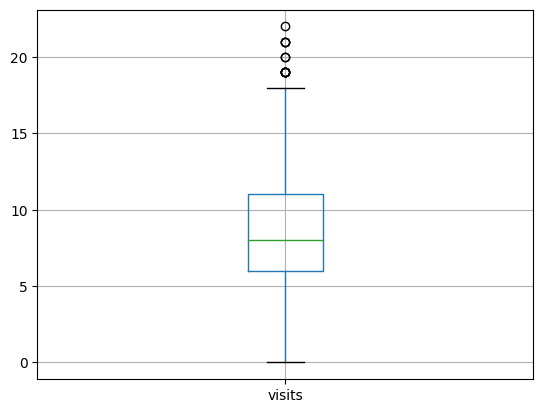

In [141]:
df.boxplot()

,visits
timestamp,
2015-11-02 00:00:00+00:00,51
2016-04-18 00:00:00+00:00,47
2016-06-05 00:00:00+00:00,55


In [142]:
p_params = range(1, 100)
maes = []
for p in p_params:
    #Train model
    model = AutoReg(y_train, lags=p).fit()
    
    #Generate in-sample pred
    y_pred = model.predict().dropna()
        
    #Calculate mae
    mae = mean_absolute_error(y_train.iloc[p:], y_pred)
    maes.append(mae)
    
mae_series = pd.Series(maes, name="mae", index=p_params)
mae_series.head()

1    3.042545
2    3.044112
3    3.010478
4    3.028873
5    3.026740
Name: mae, dtype: float64

In [146]:
mae_series[10]

2.972156714037136

In [95]:
model = AutoReg(y_train, lags=10).fit()

c:\Users\20112\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


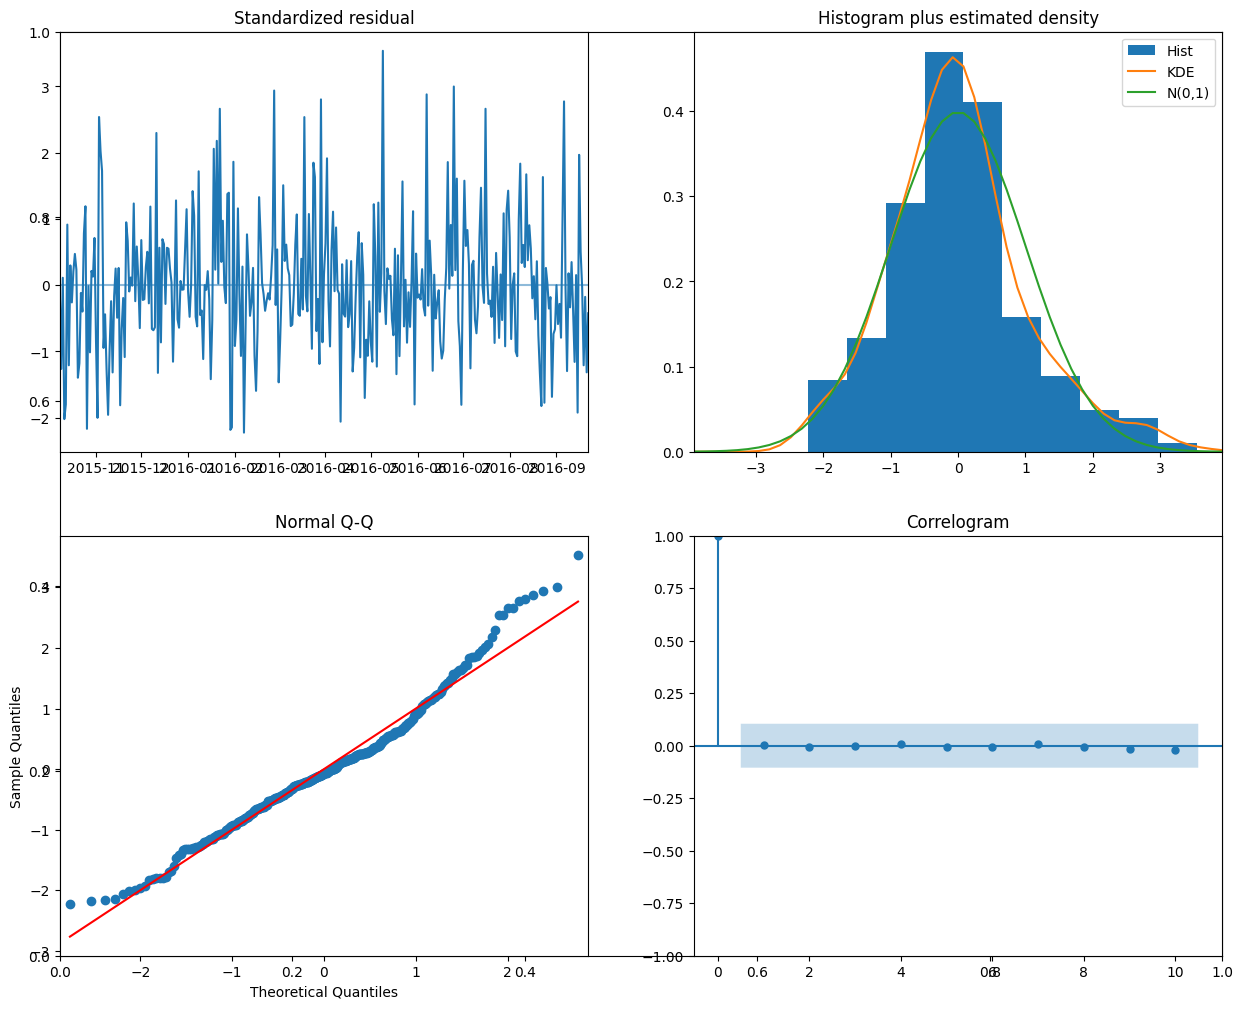

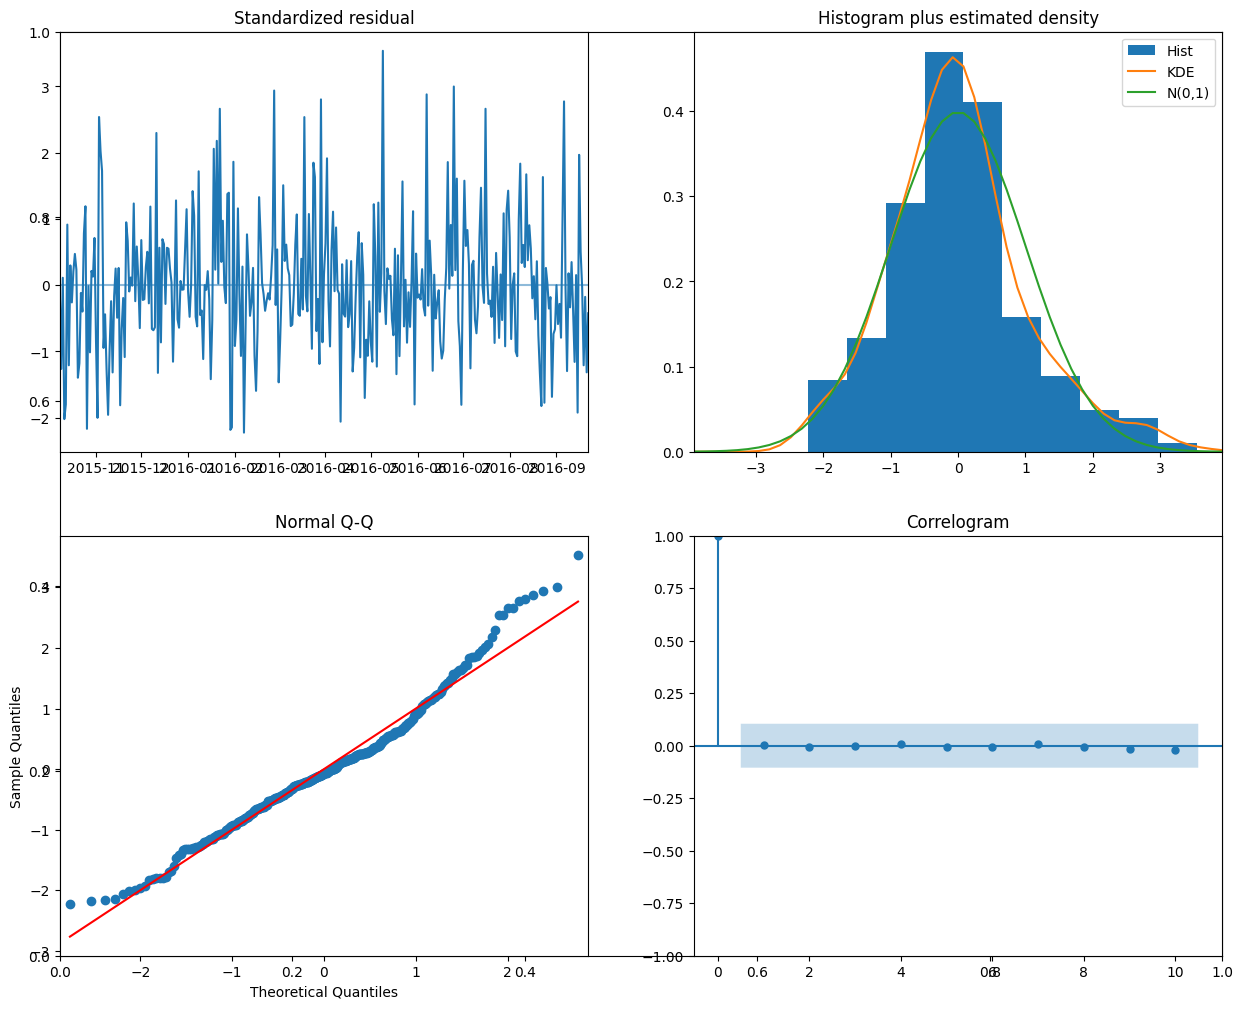

In [147]:
fig , ax = plt.subplots(figsize=(15,12))
model.plot_diagnostics(fig=fig)